In [347]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [409]:
df=pd.read_csv('preprocessed_datset.csv')  
df.head()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0,14,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,1,0
1,0,8,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1,0
2,0,16,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,1,0
3,0,15,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0
4,0,15,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0


In [410]:
x = df.drop("status", axis = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = df["status"]
print(x)

            0         1         2         3         4         5         6   \
0    -0.544805  0.727665  0.471981  0.732869  0.730835  0.493004  0.317320   
1    -0.544805 -0.307861  0.076874  0.150404  0.240260  0.252957 -0.284501   
2    -0.544805  1.072840 -0.503545 -0.024335  1.098766  1.213143  0.317320   
3    -0.544805  0.900252 -0.847926 -0.490308  0.730835  0.252957 -0.645594   
4    -0.544805  0.900252 -0.847926 -0.490308  0.730835  0.252957 -0.645594   
...        ...       ...       ...       ...       ...       ...       ...   
5203  1.835518 -0.653036 -0.490985 -0.723294 -0.740890  0.252957 -1.127051   
5204 -0.544805  0.555077  0.642940 -0.723294 -2.825833 -1.667416 -0.453011   
5205 -0.544805  0.555077  0.642940 -0.723294 -2.825833 -1.667416 -0.453011   
5206 -0.544805 -1.688561 -0.367419 -0.898033 -1.476752 -0.947276 -0.645594   
5207  1.835518  1.245427 -1.238405 -1.655238 -1.844684 -0.803249 -1.728872   

            7         8         9         10  
0     0.322288  

In [411]:
from keras.utils.np_utils import to_categorical
y_cate = to_categorical(y)
y_cate

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [412]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cate, test_size=0.2)

In [413]:
print(x_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4166, 11)
(4166, 4)
(1042, 11)
(1042, 4)


In [414]:
from tensorflow.keras.optimizers import SGD, Adam

In [463]:
model = Sequential()
model.add(Dense(60, input_shape = (11,), activation = "sigmoid"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "softmax"))
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_243 (Dense)           (None, 60)                720       
                                                                 
 dense_244 (Dense)           (None, 20)                1220      
                                                                 
 dense_245 (Dense)           (None, 15)                315       
                                                                 
 dense_246 (Dense)           (None, 10)                160       
                                                                 
 dense_247 (Dense)           (None, 4)                 44        
                                                                 
Total params: 2,459
Trainable params: 2,459
Non-trainable params: 0
_________________________________________________________________


In [464]:
model.fit(x_train, y_train, epochs=80)

Epoch 1/80
131/131 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7240
Epoch 2/80
131/131 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7640
Epoch 3/80
131/131 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7729
Epoch 4/80
131/131 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7686
Epoch 5/80
131/131 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7780
Epoch 6/80
131/131 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7722
Epoch 7/80
131/131 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7796
Epoch 8/80
131/131 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7801
Epoch 9/80
131/131 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.7715
Epoch 10/80
131/131 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7772

In [465]:
score, acc = model.evaluate(x_test, y_test)
print('test accuracy:', acc)

33/33 [==============================] - 0s 1ms/step - loss: 0.5734 - accuracy: 0.7582
test accuracy: 0.7581573724746704


In [466]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[7.9863064e-02, 7.2210278e-06, 6.2380639e-07, 9.2012906e-01],
       [5.3096432e-02, 1.5094668e-06, 7.8851500e-08, 9.4690204e-01],
       [5.8542784e-02, 1.9307238e-06, 1.0731609e-07, 9.4145525e-01],
       [4.7974563e-01, 2.3894537e-04, 3.9604856e-05, 5.1997584e-01],
       [4.4095609e-02, 7.4752592e-07, 3.1188765e-08, 9.5590353e-01]],
      dtype=float32)

In [467]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes
len(y_classes)
y_classes[:15]

[3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3]

In [468]:
y_classes1 = [np.argmax(element) for element in y_test]
y_classes1
len(y_classes1)
y_classes1[:15]

[3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0]

In [469]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_classes1, y_classes)
cm

array([[114,   0,   0, 477],
       [  0,   0,   0,   5],
       [  0,   0,   0,   4],
       [ 94,   0,   0, 348]], dtype=int64)

Text(69.0, 0.5, 'Truth')

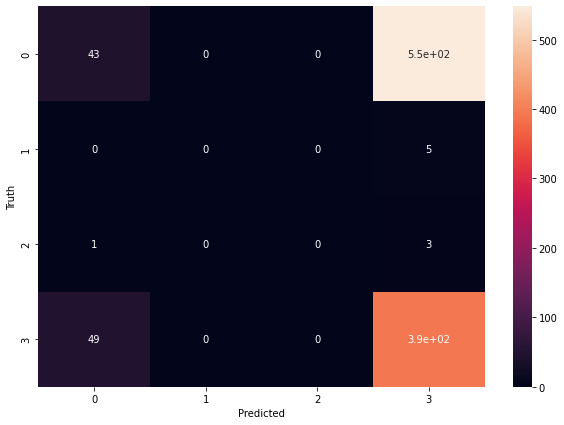

In [433]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')